In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from os.path import basename, splitext

In [2]:
files = ["./FFF.pkl","./FFT.pkl","./FTF.pkl","./TFF.pkl","./TFT.pkl","./TTF.pkl"]
names = {
    'control':files[0],
    'share_conv':files[3], 
    'reuse_coarse':files[2], 
    'reuse_fine':files[1],
    'share_reuse_coarse':files[5],
    'share_reuse_fine':files[4]
}

In [3]:
def plt_keys(history, keys, legend_loc='upper right', title=None, save=True):
    xs = np.arange(len(history[keys[0]]))
    for k in keys:
        plt.plot(xs, history[k], label=k)
    plt.legend(loc=legend_loc)
    if title:
        plt.title(title)
    else:
        title='viz.png'
    if save:
        plt.savefig(title)

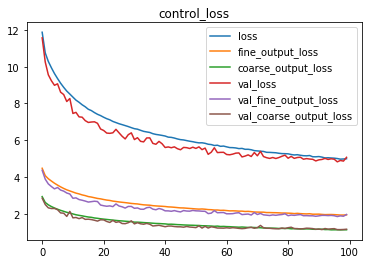

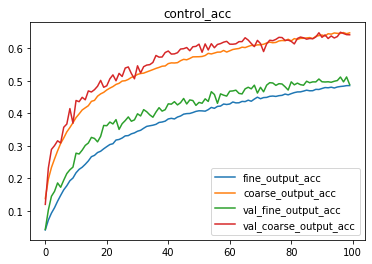

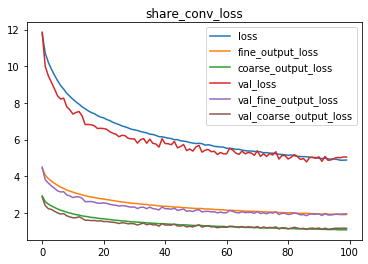

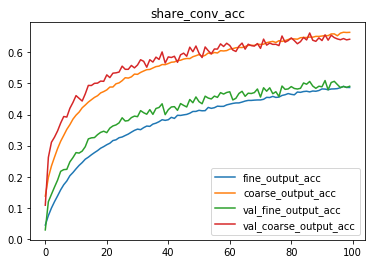

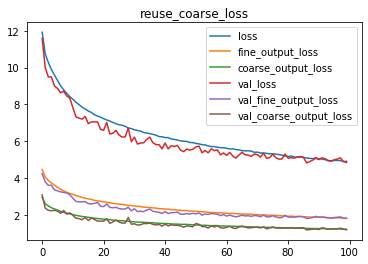

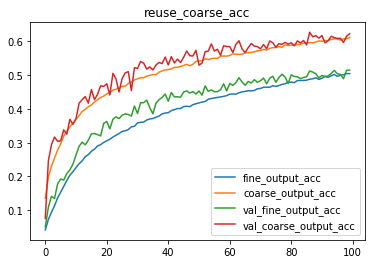

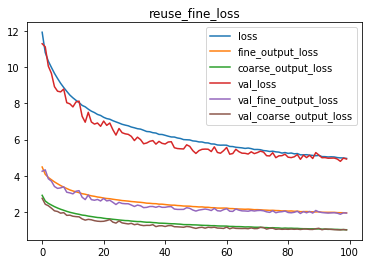

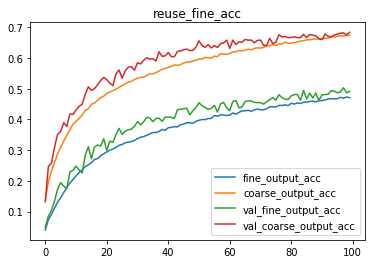

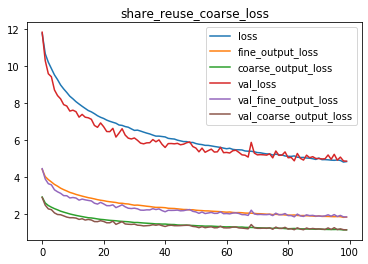

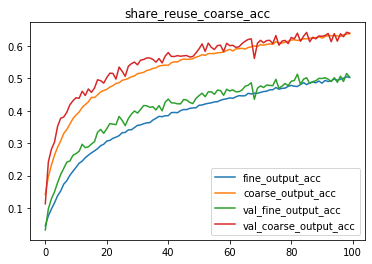

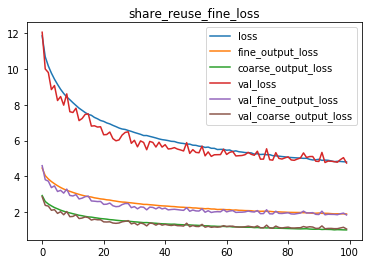

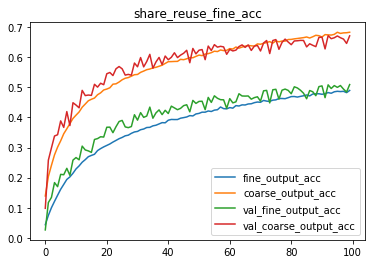

In [23]:
for name_index, (name, fname) in enumerate(names.items()):
    with open(fname,'rb') as f:
        d = pickle.load(f)
        plt_keys(d, ['loss','fine_output_loss', 'coarse_output_loss', 'val_loss','val_fine_output_loss', 'val_coarse_output_loss'], 'upper right', f"{name}_loss")
        plt.show()
        plt_keys(d, ['fine_output_acc', 'coarse_output_acc','val_fine_output_acc', 'val_coarse_output_acc'], 'lower right', f"{name}_acc")
        plt.show()


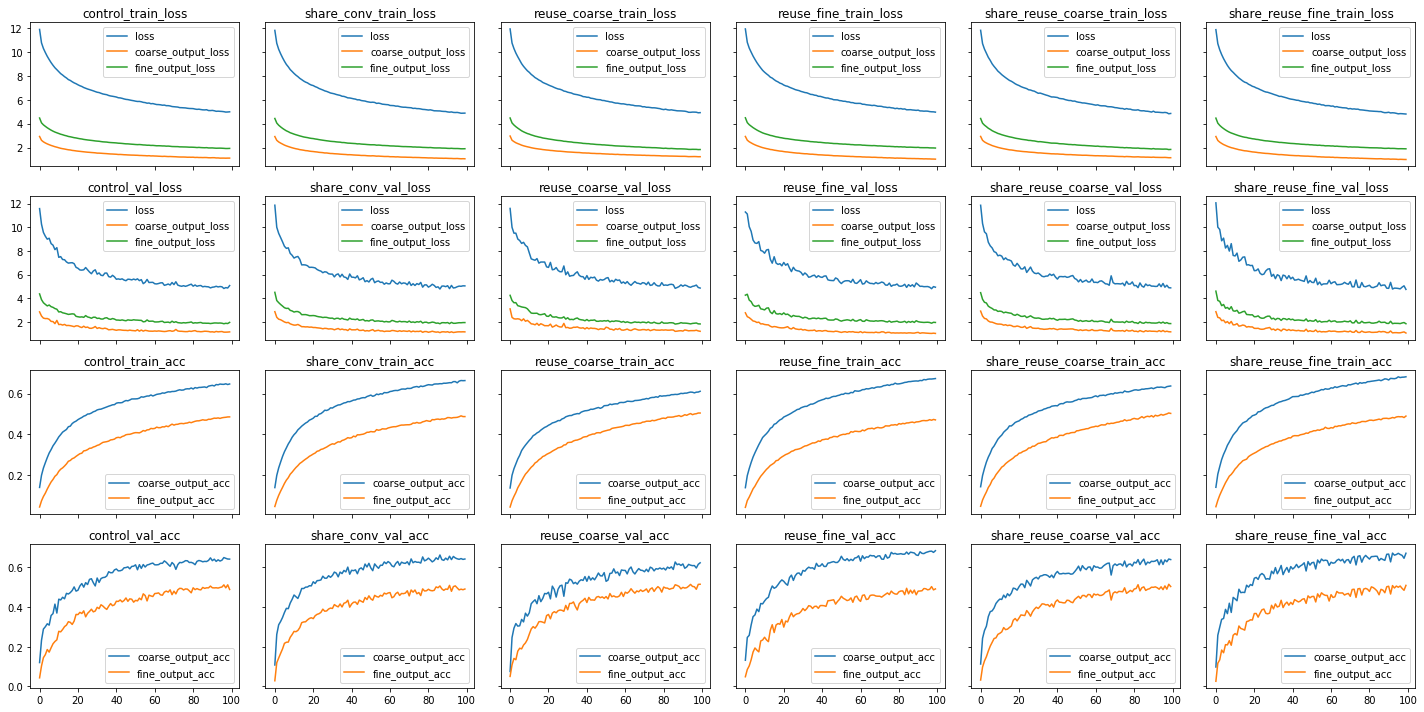

In [39]:
fig,axarr = plt.subplots(4, 6, sharey='row', sharex='col', figsize=(20,10))
for name_index, (name, fname) in enumerate(names.items()):
    # print(name, fname)
    with open(fname,'rb') as f:
        history = pickle.load(f)
        xs = np.arange(len(history['loss']))
        # plot train losses
        axarr[0, name_index].plot(xs, history['loss'], label='loss')
        axarr[0, name_index].plot(xs, history['coarse_output_loss'], label='coarse_output_loss')
        axarr[0, name_index].plot(xs, history['fine_output_loss'], label='fine_output_loss')
        axarr[0, name_index].set_title(f"{name}_train_loss")
        axarr[0, name_index].legend(loc='upper right')
        # plot val losses
        axarr[1, name_index].plot(xs, history['val_loss'], label='loss')
        axarr[1, name_index].plot(xs, history['val_coarse_output_loss'], label='coarse_output_loss')
        axarr[1, name_index].plot(xs, history['val_fine_output_loss'], label='fine_output_loss')
        axarr[1, name_index].set_title(f"{name}_val_loss")
        axarr[1, name_index].legend(loc='upper right')
        # plot train acc
        axarr[2, name_index].plot(xs, history['coarse_output_acc'], label='coarse_output_acc')
        axarr[2, name_index].plot(xs, history['fine_output_acc'], label='fine_output_acc')
        axarr[2, name_index].set_title(f"{name}_train_acc")
        axarr[2, name_index].legend(loc='lower right')
        # plot val acc
        axarr[3, name_index].plot(xs, history['val_coarse_output_acc'], label='coarse_output_acc')
        axarr[3, name_index].plot(xs, history['val_fine_output_acc'], label='fine_output_acc')
        axarr[3, name_index].set_title(f"{name}_val_acc")
        axarr[3, name_index].legend(loc='lower right')
        #fig.suptitle('All Model Statistics')
plt.tight_layout()
plt.savefig('all-stats.png')

In [7]:
def print_stats(h):
    print(f"loss: {h['loss'][-1]}")
    print(f"fine_output_loss: {h['fine_output_loss'][-1]}")
    print(f"coarse_output_loss: {h['coarse_output_loss'][-1]}")
    print(f"fine_output_acc: {h['fine_output_acc'][-1]}")
    print(f"coarse_output_acc: {h['coarse_output_acc'][-1]}")
    print(f"val_loss: {h['val_loss'][-1]}")
    print(f"val_fine_output_loss: {h['val_fine_output_loss'][-1]}")
    print(f"val_coarse_output_loss: {h['val_coarse_output_loss'][-1]}")
    print(f"val_fine_output_acc: {h['val_fine_output_acc'][-1]}")
    print(f"val_coarse_output_acc: {h['val_coarse_output_acc'][-1]}")

for name_index, (name, fname) in enumerate(names.items()):
    with open(fname,'rb') as f:
        history = pickle.load(f)
        print()
        print(name)
        print_stats(history)


control
loss: 4.990640307664871
fine_output_loss: 1.933883786201477
coarse_output_loss: 1.1228731870651245
fine_output_acc: 0.4855250120162964
coarse_output_acc: 0.6475499868392944
val_loss: 5.0673159408569335
val_fine_output_loss: 1.9562302827835083
val_coarse_output_loss: 1.1548556089401245
val_fine_output_acc: 0.4885999858379364
val_coarse_output_acc: 0.6416000127792358

share_conv
loss: 4.880973518490792
fine_output_loss: 1.9071214199066162
coarse_output_loss: 1.0667322874069214
fine_output_acc: 0.4870249927043915
coarse_output_acc: 0.6643000245094299
val_loss: 5.0405767321586605
val_fine_output_loss: 1.942041039466858
val_coarse_output_loss: 1.1564956903457642
val_fine_output_acc: 0.4909000098705292
val_coarse_output_acc: 0.6420999765396118

reuse_coarse
loss: 4.920972828865051
fine_output_loss: 1.8401838541030884
coarse_output_loss: 1.2406032085418701
fine_output_acc: 0.5045750141143799
coarse_output_acc: 0.6115999817848206
val_loss: 4.858230218887329
val_fine_output_loss: 1.825

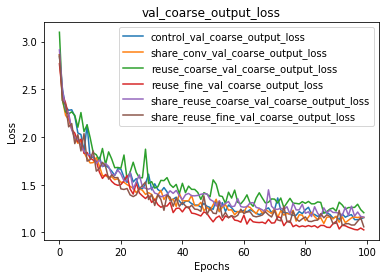

In [42]:
def plot_cross_runs(key, location='upper right'):
    for name_index, (name, fname) in enumerate(names.items()):
        with open(fname,'rb') as f:
            history = pickle.load(f)
            plt.plot(xs, history[key], label=f"{name}_{key}")
            plt.legend(loc=location)
            plt.title(key)
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
plot_cross_runs('val_coarse_output_loss','upper right')
plt.savefig('val_coarse_output_loss.png')